# PyTorch Computer Vision
https://www.learnpytorch.io/03_pytorch_computer_vision/



## Computer  Vision  libraries in pyTorch
* `torchvision` - https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data(images) to be suitabel for us e with ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [101]:
#Import torch
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

we will be using the fashin MNIST form torchvision.datasets

In [102]:
#set up training data
train_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train = True, # do we want train dataset or test dataset
    download = True, # do we want to download data
    transform=ToTensor(), # how to transform the data
    target_transform=None #how to transformt he labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download = True,
    transform=ToTensor(),
    target_transform=None
)


In [103]:
len(train_data), len(test_data)

(60000, 10000)

In [104]:
# lets train the first computer vision model
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [105]:
classnames = train_data.classes
classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [106]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [107]:
# lets check the chape
print(f"Image shape: {image.shape} -> [Color_channels, Height, width]")
print(f"label: {label}")

Image shape: torch.Size([1, 28, 28]) -> [Color_channels, Height, width]
label: 9


### 1.2 Visualize our data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

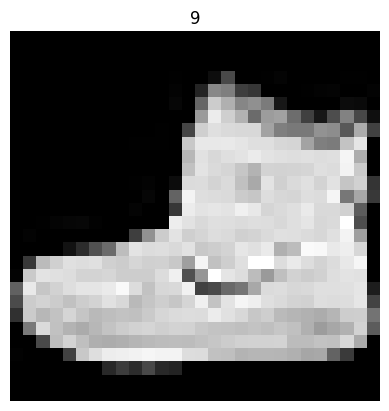

In [108]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.title(label)
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)

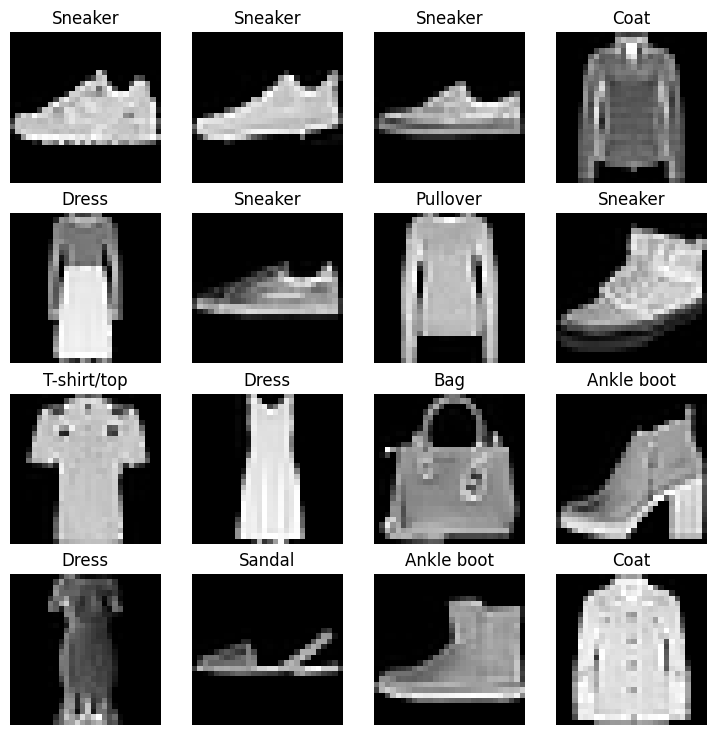

In [109]:
#Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))

rows, cols = 4,4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(classnames[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linearlines?

## 2. Prepare our Dataloader

Right now our data is in form of PyTorch Datasets.
Dataloader turns datasets to Python iterable
More specifically, w want to turn our data into batches ( or mini batches)

Why should we do this?
1. It is more computationally efficient, as in your computing hardware may not be able to look at and store in memory. so we break it down to 32 images ar a time.
2. It gives our NN more changes to uipdate its gradient per epoch
Ref videi: Andrew Ng: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [110]:
from torch.utils.data import DataLoader

#set up batch size
BATCH_SIZE = 32

# Turn data into iterables
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)



In [111]:
# lets check what we ahve created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7823d5ce30a0>, <torch.utils.data.dataloader.DataLoader object at 0x7823d5ce2f50>)
length of train_dataloader: 1875 batches of 32
length of test_dataloader: 313 batches of 32


In [112]:
#check out what s inside the training data loader
train_features_batch, train_labels_batch  = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Bag')

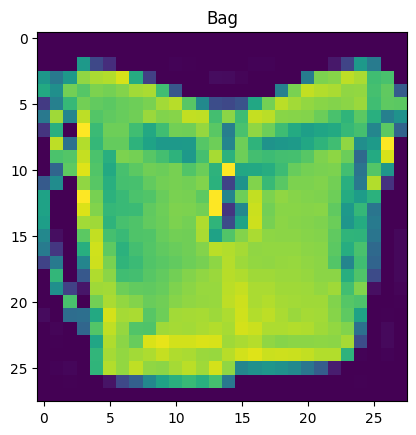

In [113]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze())
plt.title(classnames[label])




## 3. Model 0: Build a baseline model

When starting abuild a series of machine learning modelling xperiments, it is best practice to use a baseline
A baseline is a simple model you will try and improve uppion with subsequent experiments.

In [114]:
#create a flatten layer - Data Encoding in a way

flatten_model = nn.Flatten()

#gge a single sample
x = train_features_batch[0]

#flatten the sample
output = flatten_model(x) # performs foward pass on the flatten layer

print(f"shape befpre flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

shape befpre flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [115]:
from torch import nn

class FashinMNISTV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [116]:
torch.manual_seed(42)

#set up model
model_0 = FashinMNISTV0(
    input_shape = 28*28,
    hidden_units=10,
    output_shape = len(classnames)
)

model_0.to("cpu")

FashinMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [117]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x) # => returns 10 logits

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Optimizers and Loss functions

* Loss function - `nn.CrossEntropyLoss` as it is a multiclass
* Optimizer - `torch.optim.SGD` for stochastic gradient descent
* Evaluation metric* - Accuracy

In [118]:
import requests
from pathlib import Path

#download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [119]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

### 3.2 Create a function to time out experiements
ML is veryu experimental. 2 things to tracl mainly are metrics like loss, accuracy etc.
Usual;ly we need higher performance and fast model .

In [120]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference betwee start and end time."""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [121]:
start_time = timer()
end_time = timer()

print_train_time(start = start_time,
                 end=end_time,
                 device="cpu")


Train time on cpu: 0.000 seconds


6.013899837853387e-05

### 3.3 Creating a training loop and teraiing a model on batches of data


1. loop through epochs
2. Loop through the training batches, perform straining steps, , calculate the train loss
3. loopp through the testing batches , operfrm testing steps, calculate the test loss *per batch*
4. Print out whats happening
5. time it all


In [122]:
#import tqdm for progress bar
from tqdm.auto import tqdm
#set the seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

#set the number of epochs
epochs = 3

#create train and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  ###Training
  train_loss = 0
  #Add a  loop for training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)
    #2. calc loss
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    #3. optmizer grad
    optimizer.zero_grad()
    #4. loss backward
    loss.backward()
    #5. optimizer step
    optimizer.step()

    #print out whats happenin'
    if batch % 400 == 0:
      print(f"Lookd at {batch*len(X)/len(train_dataloader.dataset)} samples.")

  #avg train loss per epoch
  train_loss /= len(train_dataloader)

  ##Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)
      #2. calc loss
      test_loss += loss_fn(test_pred, y_test)
      #acc
      test_acc += accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))
    #calc loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  #print out whats happenin'
  print(f"\n Train Loss: {train_loss: .4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

#calc train time
time_end = timer()
total_train_time = print_train_time(start = train_time_start,
                                    end=time_end,
                                    device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Lookd at 0.0 samples.
Lookd at 0.21333333333333335 samples.
Lookd at 0.4266666666666667 samples.
Lookd at 0.64 samples.
Lookd at 0.8533333333333334 samples.

 Train Loss:  0.5904 | Test Loss: 0.5102, Test Acc: 82.04%
Epoch: 1
Lookd at 0.0 samples.
Lookd at 0.21333333333333335 samples.
Lookd at 0.4266666666666667 samples.
Lookd at 0.64 samples.
Lookd at 0.8533333333333334 samples.

 Train Loss:  0.4743 | Test Loss: 0.5268, Test Acc: 81.68%
Epoch: 2
Lookd at 0.0 samples.
Lookd at 0.21333333333333335 samples.
Lookd at 0.4266666666666667 samples.
Lookd at 0.64 samples.
Lookd at 0.8533333333333334 samples.

 Train Loss:  0.4537 | Test Loss: 0.5126, Test Acc: 83.00%
Train time on cpu: 70.707 seconds


## 4. Make predictions and get Model 0 results:

In [123]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of tjhe model predicting ont he data loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      #make predictions
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim =1))
    #scale the loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


In [124]:
model_0_results = eval_model(model=model_0,
                              data_loader = test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashinMNISTV0',
 'model_loss': 0.5119838118553162,
 'model_acc': 83.02715654952077}

## 5. Setting up Device adnostic code (for using a GPU)

In [125]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [126]:
#set up device agnostic

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Building model 1 with non-linearity

We learned abt the power of non linearity in Notebook-02 , NNs can learn almost anything in combination of Linear and non linear layers


In [127]:
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()

    )
  def forward(self, x):
    return self.layer_stack(x)

In [128]:
torch.manual_seed(42)
model_1 = FashionMNISTV1(input_shape = 28*28,
                         hidden_units =10,
                         output_shape=len(classnames)).to(device)
model_1


FashionMNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 set up loss, optim and eval metrics

In [129]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluating/testing loops
Create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [130]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training step with model on data loader."""
  train_loss, train_acc = 0,0
  model.train()
  #Add a  loop for training batches
  for batch, (X, y) in enumerate(data_loader):
    #put data on target
    X,y = X.to(device), y.to(device)
    #1. Forward pass
    y_pred = model(X)
    #2. calc loss
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim =1))
    #3. optmizer grad
    optimizer.zero_grad()
    #4. loss backward
    loss.backward()
    #5. optimizer step
    optimizer.step()

  #avg train loss per epoch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}")

In [131]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  """Test loop for model with dataloader"""
  ##Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      #1. forward pass
      test_pred = model(X_test)
      #2. calc loss
      test_loss += loss_fn(test_pred, y_test)
      #acc
      test_acc += accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))
    #calc loss per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  #print out whats happenin'
  print(f"\n Train Loss: {train_loss: .4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

In [132]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_start_device = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}-----------")
  train_step(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      optimizer=optimizer
  )
  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )
train_end_device = timer()
total_time_device = print_train_time(start=train_start_device,
                                     end=train_end_device,
                                     device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0-----------
Train Loss: 1.09199 | Train Acc: 61.34

 Train Loss:  0.4537 | Test Loss: 0.9569, Test Acc: 64.98%
Epoch:1-----------
Train Loss: 0.73779 | Train Acc: 73.69

 Train Loss:  0.4537 | Test Loss: 0.7239, Test Acc: 74.21%
Epoch:2-----------
Train Loss: 0.66776 | Train Acc: 76.08

 Train Loss:  0.4537 | Test Loss: 0.6875, Test Acc: 75.64%
Train time on cpu: 59.631 seconds


In [133]:
model_1_results = eval_model(model=model_1,
                              data_loader = test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6879838705062866,
 'model_acc': 75.62899361022365}

In [134]:
model_0_results

{'model_name': 'FashinMNISTV0',
 'model_loss': 0.5119838118553162,
 'model_acc': 83.02715654952077}

## Model 2: Building a Convolutional Neural network: TinyVGG NN
CNNs are also called as ConvNets:

Reading time: https://poloclub.github.io/cnn-explainer/

In [135]:
#create a convolutional neural network
import torch
from torch import nn
class FashinMNISTV2(nn.Module):
  """
  Model architecture that replicated the TinyCGG model from CNN explainer website
  """
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values that we can set are our hyper parameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride =1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv block 1: {x.shape}")
    x=self.conv_block_2(x)
    #print(f"Output shape of conv block 2: {x.shape}")
    x=self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x



In [136]:
torch.manual_seed(42)
model_2 = FashinMNISTV2(input_shape=1,
                        hidden_units=10,
                        output_shape=len(classnames)
                        ).to(device)

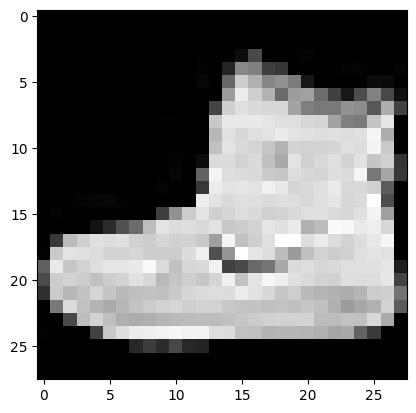

In [137]:
plt.imshow(image.squeeze(), cmap="gray")

In [138]:
image.shape


torch.Size([1, 28, 28])

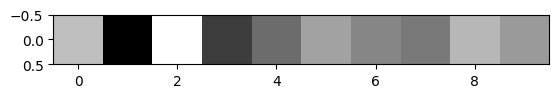

In [139]:
resp = model_2(image.unsqueeze(0))
plt.imshow(resp.detach().numpy(), cmap="gray")

### 7.1 Stepping through nn.Conv2d

In [140]:
torch.manual_seed(42)

#create a batch of images.
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single Image: {test_image.shape}")
print(f"\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image: torch.Size([3, 64, 64])

 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  

In [141]:
#Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels = 10,
                       kernel_size=3, #equivalent to 3X3 tuple
                       stride=1,
                       padding=0)
#pass the data thru the conv layer
conv_op = conv_layer(test_image)

In [142]:
conv_op.shape

torch.Size([10, 62, 62])


###7.2 Stepping through nn.maxPool2d()

In [143]:
#print out original image shape
print(f"Image shape: {test_image.shape}")

#create maxPool2d layer

max_pool_layer = nn.MaxPool2d(
    kernel_size=2
)

#pass data through conv layer first
test_image_thru_conv = conv_layer(test_image)
print(f"Thru conv layer shape: {test_image_thru_conv.shape}")

#pass thru max pool
test_img_thru_conv_and_maxpool = max_pool_layer(test_image_thru_conv)
print(f"Thru Maxpool layer shape: {test_img_thru_conv_and_maxpool.shape}")

Image shape: torch.Size([3, 64, 64])
Thru conv layer shape: torch.Size([10, 62, 62])
Thru Maxpool layer shape: torch.Size([10, 31, 31])


In [144]:
random_tensor = torch.randn(size=(1,1,2,2))
maxpool_ly = nn.MaxPool2d(kernel_size = 2)
maxpool_tensor = maxpool_ly(random_tensor)
print(f"Random RTensor: {random_tensor}")
print(f"\nrandom_tensor Shape: {random_tensor.shape}")
print(f"\nmaxpool_tensor Output value = {maxpool_tensor}")
print(f"\nmaxpool_tensor Shape: {maxpool_tensor.shape}")


Random RTensor: tensor([[[[0.4963, 0.0045],
          [0.5534, 0.1379]]]])

random_tensor Shape: torch.Size([1, 1, 2, 2])

maxpool_tensor Output value = tensor([[[[0.5534]]]])

maxpool_tensor Shape: torch.Size([1, 1, 1, 1])


### 7.3 Setting up loss function and optimizer for `model_2`

In [145]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` CNN using our training and testing loop

In [146]:
from os import device_encoding
torch.manual_seed(42)
#measure time
from timeit import default_timer as timer
train_start_time_model2 = timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"\nEpochs: {epoch} -----------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             optimizer=optimizer,
             device =device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)
train_time_end_model2 = timer()
total_train_model_2 = print_train_time(start=train_start_time_model2,
                                       end=train_time_end_model2,
                                       device=device_encoding)

  0%|          | 0/3 [00:00<?, ?it/s]


Epochs: 0 -----------
Train Loss: 0.59518 | Train Acc: 78.38

 Train Loss:  0.4537 | Test Loss: 0.3953, Test Acc: 85.98%

Epochs: 1 -----------
Train Loss: 0.36421 | Train Acc: 86.86

 Train Loss:  0.4537 | Test Loss: 0.3896, Test Acc: 86.13%

Epochs: 2 -----------
Train Loss: 0.32472 | Train Acc: 88.31

 Train Loss:  0.4537 | Test Loss: 0.3500, Test Acc: 87.45%
Train time on <built-in function device_encoding>: 204.446 seconds


In [147]:
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

## 8. Compare model resutls and train timings

In [148]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashinMNISTV0,0.511984,83.027157
1,FashionMNISTV1,0.687984,75.628994
2,FashinMNISTV2,0.349428,87.470048


In [149]:
#add training time to results comparison
compare_results["training_time"] = [total_train_time,
                                    total_time_device,
                                    total_train_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashinMNISTV0,0.511984,83.027157,70.707107
1,FashionMNISTV1,0.687984,75.628994,59.631302
2,FashinMNISTV2,0.349428,87.470048,204.446051


Text(0, 0.5, 'model')

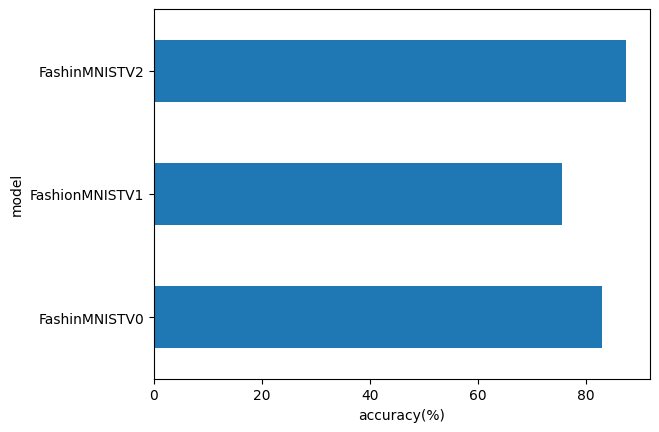

In [150]:
#Visualize
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9. Make and evaluate random predictiosn with the best model

In [151]:
## 9. make and evaluate random predictiosn with the best model

def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device=device):
  model.to(device)
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample and pass to target device
      sample = torch.unsqueeze(sample, dim=0).to(device)
      #Forwward pass
      pred_logit = model(sample)
      #get pred prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #get_pred_prob off GPU
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

Text(0.5, 1.0, 'Pullover')

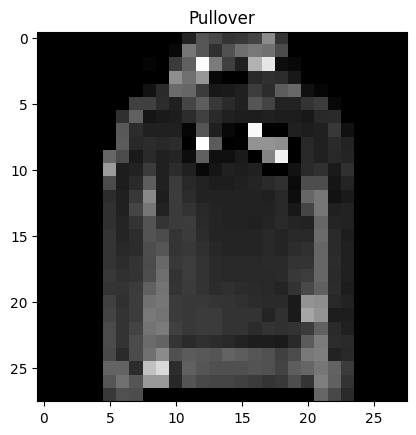

In [152]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view a sample
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(classnames[test_labels[0]])


In [153]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
#view the first 2
pred_probs[:2]

#convert pred prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

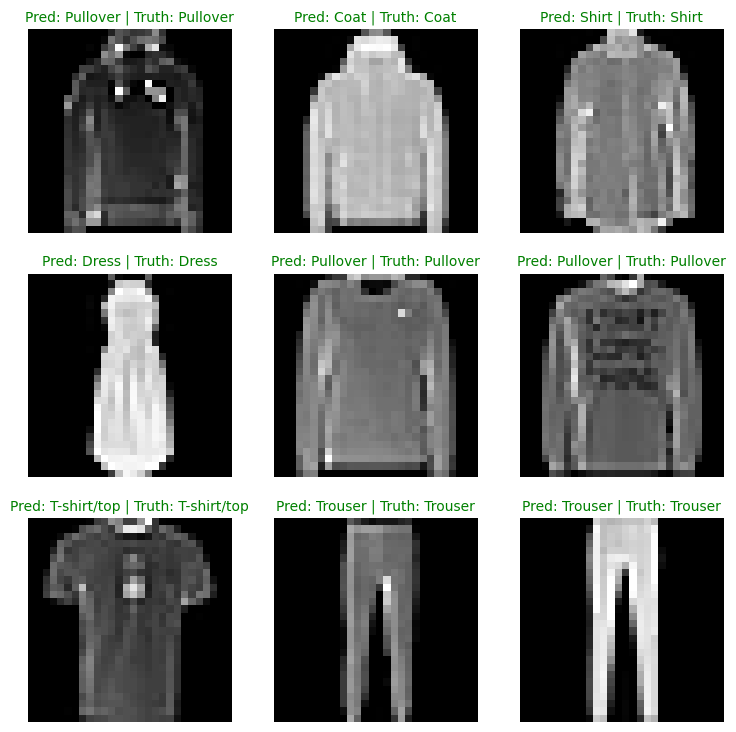

In [154]:
#plot predictions
plt.figure(figsize=(9,9))
nrows =3
ncols=3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols, i+1)

  #plot target image
  plt.imshow(sample.squeeze(), cmap="gray")
  #find pred labels
  pred_label = classnames[pred_classes[i]]
  # get the truth label
  truth_label = classnames[test_labels[i]]

  #Create a title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  #c heck equality between pred and truth and change color of the title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10,c="g" ) #green if correct prediction
  else:
    plt.title(title_text, fontsize=10,c="r" ) #red if wrong pred
  plt.axis(False)

## 10. Making a confusion matric for further preduiction evaluation
More reading at: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

1. Make predictions with our trained model on the test dataset
2. Make a confusio matric `torchmetrics.ConfusionMatrix`
3. Plot using `mlxtend.plotting.plot_confusion_matric()`

In [155]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [158]:
from tqdm.auto import tqdm
#1. make predictions with trained modeil
y_preds=[]

model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc ="making predictions.."):
    #send data to target device
    X,y = X.to(device), y.to(device)
    #forward pass
    y_logit = model_2(X)
    #pred logit -prob - logit
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

making predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([2, 8, 4, 4, 8, 4, 4, 7, 6, 9, 1, 4, 9, 2, 4, 7, 5, 1, 3, 5, 1, 8, 2, 3,
        8, 0, 6, 8, 4, 4, 9, 1]), tensor([4, 4, 9, 4, 1, 2, 7, 1, 9, 2, 4, 4, 3, 9, 1, 1, 7, 4, 7, 1, 9, 1, 8, 4,
        9, 5, 6, 8, 0, 9, 4, 5]), tensor([8, 3, 0, 4, 3, 9, 2, 9, 7, 0, 0, 3, 2, 4, 6, 1, 2, 8, 9, 2, 6, 5, 8, 5,
        7, 6, 1, 4, 2, 1, 8, 3]), tensor([7, 5, 9, 7, 8, 8, 3, 4, 8, 2, 1, 7, 9, 2, 3, 4, 4, 6, 3, 7, 5, 6, 2, 0,
        6, 7, 2, 1, 9, 7, 5, 9]), tensor([4, 7, 8, 1, 4, 3, 8, 6, 2, 9, 8, 7, 5, 9, 4, 2, 1, 1, 7, 5, 4, 2, 0, 9,
        7, 2, 4, 8, 6, 2, 2, 1]), tensor([8, 4, 1, 6, 1, 4, 2, 1, 7, 0, 6, 2, 4, 1, 4, 9, 3, 2, 8, 3, 1, 8, 6, 2,
        3, 6, 9, 5, 6, 3, 6, 2]), tensor([3, 8, 7, 5, 3, 8, 5, 3, 9, 4, 3, 1, 0, 8, 6, 3, 8, 2, 1, 6, 2, 2, 9, 1,
        6, 5, 4, 8, 4, 2, 7, 2]), tensor([5, 9, 0, 7, 4, 4, 0, 0, 1, 8, 8, 4, 3, 2, 1, 8, 9, 9, 3, 6, 6, 6, 8, 3,
        6, 4, 8, 1, 0, 3, 1, 5]), tensor([0, 7, 4, 1, 5, 8, 8, 6, 2, 1, 2, 9, 7, 9, 6, 0, 7, 8, 6, 2, 2, 3, 6, 2,
       

tensor([2, 8, 4, 4, 8, 4, 4, 7, 6, 9])

In [165]:
# see if rewuired packages are installed, if not install them
try:
  import torchmetrics, mlxtend
  print(f"mlextend version: {mlxtend.__version__}")
  assert(int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlextend version: 0.22.0


<>:5: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:5: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-165-5cd8a17d58ca>:5: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher")


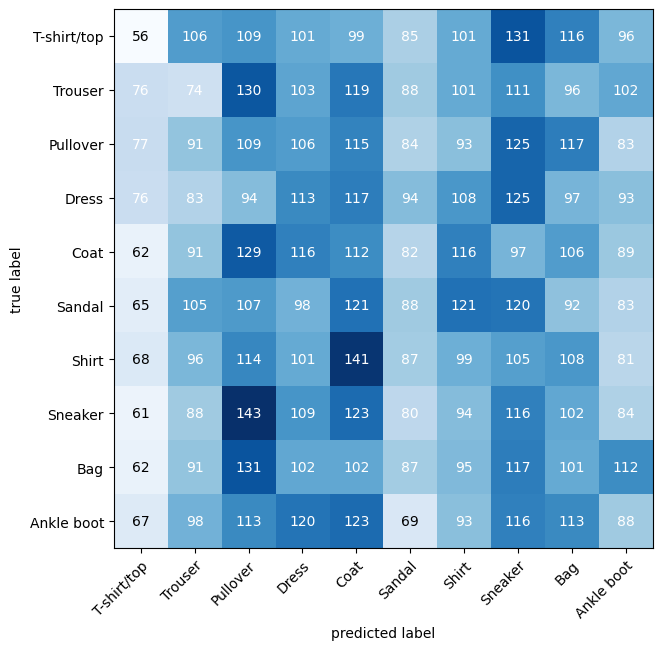

In [167]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# set up confusion matric
confmat = ConfusionMatrix(num_classes = len(classnames),
                          task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. Plot the matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = classnames,
    figsize=(10,7)
)

## 11. Saving and loading the best trained model

In [169]:
from pathlib import Path
#create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok=True)
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#save model state dfict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/03_pytorch_computer_vision_model_2.pth


In [173]:
#create a new instance of model 2
loaded_model = FashinMNISTV2(input_shape=1,
                             hidden_units = 10,
                             output_shape=len(classnames))
#load saved model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send model to device
loaded_model.to(device)

#evaluate loaded model
loaded_model_results = eval_model(model=loaded_model,
                                  data_loader = test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn = accuracy_fn)
print(loaded_model_results)
print(model_2_results)


{'model_name': 'FashinMNISTV2', 'model_loss': 0.34946346282958984, 'model_acc': 87.47004792332268}
{'model_name': 'FashinMNISTV2', 'model_loss': 0.3494281768798828, 'model_acc': 87.47004792332268}


In [179]:
#check if results are close
torch.isclose(torch.tensor(model_2_results["model_loss"]),torch.tensor(loaded_model_results["model_loss"]),
              atol=1e-04)

tensor(True)